In [2]:
using Plots

using MMCAcovid19
using Random
using Distributions

# Random mobility
using LightGraphs

In [11]:
# Number of strata
G = 3

# Number of patches
M = 5

g_probs = [0.1, 0.6, 0.3]
m_probs = [0.05, 0.10, 0.15, 0.30, 0.40]
probs = transpose(m_probs) .* g_probs
total_population = 1000000
distrib = Multinomial(total_population, reshape(probs, (1, G * M))[1, :])
nᵢᵍ = convert.(Float64, reshape(rand(distrib), (G, M)))

# Strata contacts
C = [0.5980 0.3849 0.0171
     0.2440 0.7210 0.0350
     0.1919 0.5705 0.2376]

# network
network = erdos_renyi(M, 0.7, is_directed=true)
for i in 1:M
  add_edge!(network, i, i)   # add self-loops
end
# list of edges
L = ne(network)
edgelist = zeros(Int64, L, 2)
edgelist[:, 1] .= src.(edges(network))
edgelist[:, 2] .= dst.(edges(network))
# list of commuting probabilities
Rᵢⱼ = rand(L)
sum_r = zeros(M)
for e in 1:L   # find output strengths
  i = edgelist[e, 1]
  sum_r[i] += Rᵢⱼ[e]
end
for e in 1:L   # normalize weights
  i = edgelist[e, 1]
  Rᵢⱼ[e] /= sum_r[i]
end

# Average number of contacts per strata
kᵍ = [11.8, 13.3, 6.6]

# Average number of contacts at home per strata
kᵍ_h = [3.15, 3.17, 3.28]

# Average number of contacts at work per strata
kᵍ_w = [1.72, 5.18, 0.0]

# Degree of mobility per strata
pᵍ = [0.0, 1.0, 0.05]

# Patch surfaces (in km²)
sᵢ = [10.6, 23.0, 26.6, 5.7, 61.6]

# Density factor
ξ = 0.01

# Average household size
σ = 2.5

# Infectivity of infected
βᴵ = 0.075

# Infectivity of asymptomatic
βᴬ = 0.5 * βᴵ

# Exposed rate
ηᵍ = [1/2.444, 1/2.444, 1/2.444]

# Asymptomatic infectious rate
αᵍ = [1/5.671, 1/2.756, 1/2.756]

# Infectious rate
μᵍ = [1/1.0, 1/3.915, 1/3.915]

# Direct death probability
θᵍ = [0.0, 0.008, 0.047]

# ICU probability
γᵍ = [0.0003, 0.003, 0.026]

# Pre-deceased rate
ζᵍ = [1/7.084, 1/7.084, 1/7.084]

# Pre-hospitalized in ICU rate
λᵍ = [1/4.084, 1/4.084, 1/4.084]

# Fatality probability in ICU
ωᵍ = [0.3, 0.3, 0.3]

# Death rate in iCU
ψᵍ = [1/7.0, 1/7.0, 1/7.0]

# ICU discharge rate
χᵍ = [1/20.0, 1/20.0, 1/20.0]

# Number of timesteps
T = 10

# Initial number of exposed individuals
E₀ = zeros(G, M)

# Initial number of infectious asymptomatic individuals
A₀ = zeros(G, M)
A₀[2, 5] = 2.0
A₀[3, 3] = 1.0

# Initial number of infectious symptomatic individuals
I₀ = zeros(G, M)
I₀[2, 5] = 1.0

# Timestep of application of containment
tᶜ = 30

# Mobility reduction
κ₀ = 0.65

# Permeability of confined households
ϕ = 0.174

# Social distancing
δ = 0.207

# List of timesteps of application of containments
tᶜs = [30, 60, 90, 120]

# List of mobility reductions
κ₀s = [0.65, 0.75, 0.65, 0.55]

# List of permeabilities of confined households
ϕs = [0.174, 0.174, 0.174, 0.174]

# List of social distancings
δs = [0.207, 0.207, 0.207, 0.207]

4-element Array{Float64,1}:
 0.207
 0.207
 0.207
 0.207

In [12]:
# Experimento 1: experimento de control, simular 20 dias

# Population parameters
population1 = Population_Params(G, M, nᵢᵍ, kᵍ, kᵍ_h, kᵍ_w, C, pᵍ, edgelist, Rᵢⱼ, sᵢ, ξ, σ)

# Epidemic parameters
epi_params1 = Epidemic_Params(βᴵ, βᴬ, ηᵍ, αᵍ, μᵍ, θᵍ, γᵍ, ζᵍ, λᵍ, ωᵍ, ψᵍ, χᵍ, G, M, 20)

# Run the model
reset_params!(epi_params1, population1)
set_initial_infected!(epi_params1, population1, E₀, A₀, I₀)
run_epidemic_spreading_mmca!(epi_params1, population1; verbose = true)

Time: 1, players: 1000000.00, infected: 4.00, cases: 0.00, icus: 0.00, deaths: 0.00
Time: 2, players: 1000000.00, infected: 3.74, cases: 0.26, icus: 0.00, deaths: 0.00
Time: 3, players: 1000000.00, infected: 4.07, cases: 0.72, icus: 0.00, deaths: 0.00
Time: 4, players: 1000000.00, infected: 4.86, cases: 1.25, icus: 0.00, deaths: 0.00
Time: 5, players: 1000000.00, infected: 6.00, cases: 1.83, icus: 0.00, deaths: 0.00
Time: 6, players: 1000000.00, infected: 7.46, cases: 2.51, icus: 0.01, deaths: 0.01
Time: 7, players: 1000000.00, infected: 9.32, cases: 3.33, icus: 0.01, deaths: 0.01
Time: 8, players: 1000000.00, infected: 11.68, cases: 4.34, icus: 0.01, deaths: 0.02
Time: 9, players: 1000000.00, infected: 14.69, cases: 5.60, icus: 0.02, deaths: 0.03
Time: 10, players: 1000000.00, infected: 18.52, cases: 7.18, icus: 0.02, deaths: 0.04
Time: 11, players: 1000000.00, infected: 23.41, cases: 9.16, icus: 0.03, deaths: 0.05
Time: 12, players: 1000000.00, infected: 29.64, cases: 11.66, icus: 0.

In [85]:
# Experimento 2: Simulación parcial

# Population parameters
population2 = Population_Params(G, M, nᵢᵍ, kᵍ, kᵍ_h, kᵍ_w, C, pᵍ, edgelist, Rᵢⱼ, sᵢ, ξ, σ)

# Epidemic parameters
epi_params2 = Epidemic_Params(βᴵ, βᴬ, ηᵍ, αᵍ, μᵍ, θᵍ, γᵍ, ζᵍ, λᵍ, ωᵍ, ψᵍ, χᵍ, G, M, 10)

# Run the model
reset_params!(epi_params2, population2)
set_initial_infected!(epi_params2, population2, E₀, A₀, I₀)
run_epidemic_spreading_mmca!(epi_params2, population2; verbose = true)

Time: 1, players: 1000000.00, infected: 4.00, cases: 0.00, icus: 0.00, deaths: 0.00
Time: 2, players: 1000000.00, infected: 3.74, cases: 0.26, icus: 0.00, deaths: 0.00
Time: 3, players: 1000000.00, infected: 4.14, cases: 0.72, icus: 0.00, deaths: 0.00
Time: 4, players: 1000000.00, infected: 5.07, cases: 1.25, icus: 0.00, deaths: 0.00
Time: 5, players: 1000000.00, infected: 6.37, cases: 1.84, icus: 0.00, deaths: 0.00
Time: 6, players: 1000000.00, infected: 8.02, cases: 2.54, icus: 0.01, deaths: 0.01
Time: 7, players: 1000000.00, infected: 10.09, cases: 3.41, icus: 0.01, deaths: 0.01
Time: 8, players: 1000000.00, infected: 12.69, cases: 4.49, icus: 0.01, deaths: 0.02
Time: 9, players: 1000000.00, infected: 15.98, cases: 5.86, icus: 0.02, deaths: 0.03
Time: 10, players: 1000000.00, infected: 20.15, cases: 7.57, icus: 0.02, deaths: 0.04


Time: 1, players: 1000000.00, infected: 20.15, cases: 7.57, icus: 0.02, deaths: 0.04
Time: 2, players: 1000000.00, infected: 25.44, cases: 9.73, icus: 0.03, deaths: 0.05
Time: 3, players: 1000000.00, infected: 32.16, cases: 12.45, icus: 0.04, deaths: 0.07
Time: 4, players: 1000000.00, infected: 40.71, cases: 15.88, icus: 0.04, deaths: 0.09
Time: 5, players: 1000000.00, infected: 51.58, cases: 20.21, icus: 0.06, deaths: 0.11
Time: 6, players: 1000000.00, infected: 65.40, cases: 25.69, icus: 0.07, deaths: 0.14
Time: 7, players: 1000000.00, infected: 82.99, cases: 32.64, icus: 0.09, deaths: 0.18
Time: 8, players: 1000000.00, infected: 105.37, cases: 41.44, icus: 0.11, deaths: 0.23
Time: 9, players: 1000000.00, infected: 133.85, cases: 52.61, icus: 0.14, deaths: 0.29
Time: 10, players: 1000000.00, infected: 170.12, cases: 66.79, icus: 0.17, deaths: 0.36
Time: 11, players: 1000000.00, infected: 216.28, cases: 84.79, icus: 0.21, deaths: 0.45
true
true


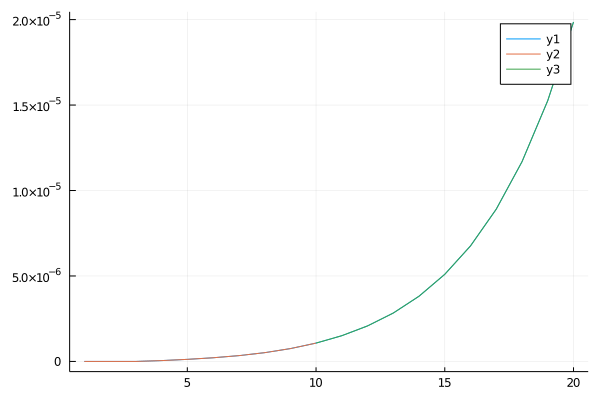

In [126]:
# Experimento 3: Continuar la Simulación parcial del experimento 2, y ver si coincide con el experimento 1
# CONCLUSIÓN: Si coincide, con copiar los compartimentos se puede continuar desde un breakpoint, lo único 
#  que hay que tener en cuenta es añadir un día más, el primero es como si no corriese

# Population parameters
population3 = Population_Params(G, M, nᵢᵍ, kᵍ, kᵍ_h, kᵍ_w, C, pᵍ, edgelist, Rᵢⱼ, sᵢ, ξ, σ)

# Epidemic parameters
epi_params3 = Epidemic_Params(βᴵ, βᴬ, ηᵍ, αᵍ, μᵍ, θᵍ, γᵍ, ζᵍ, λᵍ, ωᵍ, ψᵍ, χᵍ, G, M, 11)

# copy previous timestamp
epi_params3.ρˢᵍ[:,:,1] .= epi_params2.ρˢᵍ[:,:,10]
epi_params3.ρᴱᵍ[:,:,1] .= epi_params2.ρᴱᵍ[:,:,10]
epi_params3.ρᴬᵍ[:,:,1] .= epi_params2.ρᴬᵍ[:,:,10]
epi_params3.ρᴵᵍ[:,:,1] .= epi_params2.ρᴵᵍ[:,:,10]
epi_params3.ρᴾᴴᵍ[:,:,1] .= epi_params2.ρᴾᴴᵍ[:,:,10]
epi_params3.ρᴾᴰᵍ[:,:,1] .= epi_params2.ρᴾᴰᵍ[:,:,10]
epi_params3.ρᴴᴿᵍ[:,:,1] .= epi_params2.ρᴴᴿᵍ[:,:,10]
epi_params3.ρᴴᴰᵍ[:,:,1] .= epi_params2.ρᴴᴰᵍ[:,:,10]
epi_params3.ρᴰᵍ[:,:,1] .= epi_params2.ρᴰᵍ[:,:,10]
epi_params3.ρᴿᵍ[:,:,1] .= epi_params2.ρᴿᵍ[:,:,10]

# Run the model
# reset_params!(epi_params3, population3)
# set_initial_infected!(epi_params3, population3, E₀, A₀, I₀)
run_epidemic_spreading_mmca!(epi_params3, population3; verbose = true)

println(epi_params3.ρᴿᵍ[:,:,1] == epi_params2.ρᴿᵍ[:,:,10])
println(epi_params3.ρᴿᵍ[:,:,11] == epi_params1.ρᴿᵍ[:,:,20])

plot([1:20, 1:10, 10:20], [epi_params1.ρᴵᵍ[1,1,:], epi_params2.ρᴵᵍ[1,1,:], epi_params3.ρᴵᵍ[1,1,:]])

In [129]:
epi_params2.ρᴵᵍ[1,1,:]

10-element Array{Float64,1}:
 0.0
 0.0
 0.0
 4.8910095977034624e-8
 1.2123790498745437e-7
 2.140665783998231e-7
 3.390126642369577e-7
 5.118890008880864e-7
 7.499752310762206e-7
 1.0730770242892114e-6

In [141]:
using RollingFunctions

┌ Info: Precompiling RollingFunctions [b0e4dd01-7b14-53d8-9b45-175a3e362653]
└ @ Base loading.jl:1260


In [147]:
# epi_params2.ρᴵᵍ[1,1,:]

epi_params2.ρᴰᵍ[1,1,:] + epi_params2.ρᴿᵍ[1,1,:]

10-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 4.889542294824152e-8
 1.7009695656419966e-7
 3.8409959471628607e-7
 7.230117112099989e-7
 1.234750092555492e-6
 1.9845063624618174e-6

In [146]:
diff(rolling(sum, epi_params2.ρᴵᵍ[1,1,:], 3))

7-element Array{Float64,1}:
 4.8910095977034624e-8
 1.2123790498745437e-7
 2.1406657839982307e-7
 2.9010256825992316e-7
 3.906510959006322e-7
 5.359086526763974e-7
 7.340643600522539e-7

In [ ]:

1 0 0 1 1 1 0 0  original
    1 1 2 3 2 1  rolling sum

0 1 0 0 2 1 -1 1 different original
    1 1 2 3 2  1 same rolling sum


In [ ]:
# Experimento 4: continuar desde el breakpoint de la simulacion 2, 
#  pero unicamente inicializando los compartimentos que conocemos: muertes, incidencia 

# PROBLEMA1: inicializar incidencia no es tan facil, incidencia != infectados
# PROBLEMA2: inicializar muertes tampoco es tan facil, que poner en cada grupo de edad?


# los active_cases los puedo estimar como un rolling sum de los casos diarios, con una ventana de 7-14 días
# a partir de los active_cases no puedo estimar de vuelta los casos diarios, no se puede deshacer la rolling sum

# Infected = ? (esto no lo tengo, como mucho equivale a active_cases)
# HD = 0
# HR = 0
# PD = 0
# PR = 0
# Asyntomatic = 0?? esto no es real
# Exposed = 0?? esto me va a retrasar el inicio de la exponencial
# Deaths = Lo tengo
# Recovered = total_accumulated_cases - total_accumulated_deaths - active_cases(estimación usando los ultimos 14 días)
# Susceptibles = el resto


# Population parameters
population4 = Population_Params(G, M, nᵢᵍ, kᵍ, kᵍ_h, kᵍ_w, C, pᵍ, edgelist, Rᵢⱼ, sᵢ, ξ, σ)

# Epidemic parameters
epi_params4 = Epidemic_Params(βᴵ, βᴬ, ηᵍ, αᵍ, μᵍ, θᵍ, γᵍ, ζᵍ, λᵍ, ωᵍ, ψᵍ, χᵍ, G, M, 11)

# Compute the prevalence
prevalence = (epi_params2.ρᴵᵍ[:, :, 1:epi_params2.T] .+
               epi_params2.ρᴴᴰᵍ[:, :, 1:epi_params2.T] .+
               epi_params2.ρᴴᴿᵍ[:, :, 1:epi_params2.T] .+
               epi_params2.ρᴾᴴᵍ[:, :, 1:epi_params2.T] .+
               epi_params2.ρᴾᴰᵍ[:, :, 1:epi_params2.T] .+
               epi_params2.ρᴰᵍ[:, :, 1:epi_params2.T] .+
               epi_params2.ρᴿᵍ[:, :, 1:epi_params2.T] .+
               epi_params2.ρᴬᵍ[:, :, 1:epi_params2.T] .+
               epi_params2.ρᴱᵍ[:, :, 1:epi_params2.T]) .* population2.nᵢᵍ

prevalence
# # Compute the incidence
# incidence = diff(prevalence[:, :], dims=2)

# # Compute total number of deaths
# deaths = epi_params.ρᴰᵍ[:, :, 1:epi_params.T] .* population.nᵢᵍ

# # Compute daily new deaths
# deaths_new = diff(deaths[:, :], dims=2)

epi_params4.ρᴵᵍ[:,:,1] .= epi_params2.ρᴵᵍ[:,:,10]
epi_params4.ρᴰᵍ[:,:,1] .= epi_params2.ρᴰᵍ[:,:,10]

# infer recovered from deaths and incidence: 

# leave this compartments as 0

# epi_params4.ρˢᵍ[:,:,1] .= epi_params2.ρˢᵍ[:,:,10]
# epi_params4.ρᴱᵍ[:,:,1] .= epi_params2.ρᴱᵍ[:,:,10]
# epi_params4.ρᴬᵍ[:,:,1] .= epi_params2.ρᴬᵍ[:,:,10]
# epi_params4.ρᴾᴴᵍ[:,:,1] .= epi_params2.ρᴾᴴᵍ[:,:,10]
# epi_params4.ρᴾᴰᵍ[:,:,1] .= epi_params2.ρᴾᴰᵍ[:,:,10]
# epi_params4.ρᴴᴿᵍ[:,:,1] .= epi_params2.ρᴴᴿᵍ[:,:,10]
# epi_params4.ρᴴᴰᵍ[:,:,1] .= epi_params2.ρᴴᴰᵍ[:,:,10]
epi_params4.ρᴿᵍ[:,:,1] .= epi_params2.ρᴿᵍ[:,:,10]

# Run the model
# reset_params!(epi_params4, population4)
# set_initial_infected!(epi_params4, population4, E₀, A₀, I₀)
run_epidemic_spreading_mmca!(epi_params4, population4; verbose = true)



In [125]:
epi_params2.ρᴰᵍ

3×5×10 Array{Float64,3}:
[:, :, 1] =
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0

[:, :, 2] =
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0

[:, :, 3] =
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.20017e-9
 0.0  0.0  0.0  0.0  0.0

[:, :, 4] =
 0.0  0.0  0.0         0.0  0.0
 0.0  0.0  0.0         0.0  4.02866e-9
 0.0  0.0  1.37314e-8  0.0  0.0

[:, :, 5] =
 0.0  0.0  0.0         0.0  0.0
 0.0  0.0  0.0         0.0  8.40044e-9
 0.0  0.0  4.50356e-8  0.0  0.0

[:, :, 6] =
 0.0          0.0          0.0          0.0          0.0
 1.04432e-10  1.10603e-10  8.13139e-11  8.59792e-11  1.41484e-8
 1.73232e-10  2.45271e-10  9.33932e-8   4.91727e-11  5.27818e-10

[:, :, 7] =
 1.53977e-13  2.5616e-13   4.02151e-13  4.05657e-14  5.79645e-13
 5.14947e-10  5.45354e-10  4.00606e-10  4.24161e-10  2.11718e-8
 8.63378e-10  1.21204e-9   1.56786e-7   2.43741e-10  2.60342e-9

[:, :, 8] =
 7.83911e-13  1.30268e-12  2.05613e-12  2.0626e-13   2.

In [124]:
epi_params2.ρᴵᵍ

3×5×10 Array{Float64,3}:
[:, :, 1] =
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  4.16065e-6
 0.0  0.0  0.0  0.0  0.0

[:, :, 2] =
 0.0  0.0  0.0         0.0  0.0
 0.0  0.0  0.0         0.0  6.11725e-6
 0.0  0.0  8.10265e-6  0.0  0.0

[:, :, 3] =
 0.0  0.0  0.0         0.0  0.0
 0.0  0.0  0.0         0.0  6.47852e-6
 0.0  0.0  1.11957e-5  0.0  0.0

[:, :, 4] =
 4.89101e-8  8.13677e-8  1.27741e-7  1.28855e-8  1.84121e-7
 3.62038e-7  3.83431e-7  2.81893e-7  2.98067e-7  6.53824e-6
 1.02221e-7  1.4473e-7   1.19924e-5  2.90159e-8  3.11456e-7

[:, :, 5] =
 1.21238e-7  2.01233e-7  3.19422e-7  3.18569e-8  4.55203e-7
 1.1022e-6   1.16726e-6  8.57004e-7  9.08151e-7  6.77387e-6
 3.15445e-7  4.40504e-7  1.19194e-5  8.87541e-8  9.45082e-7

[:, :, 6] =
 2.14067e-7  3.47897e-7  5.49651e-7  6.38822e-8  7.73201e-7
 2.1382e-6   2.26174e-6  1.67122e-6  1.77088e-6  7.30544e-6
 6.25061e-7  8.57311e-7  1.16466e-5  1.87681e-7  1.81405e-6

[:, :, 7] =
 3.39013e-7  5.30763e-7  8.22774e-7  1.23302e-7  1.13966e

true

In [114]:
epi_params3.ρᴿᵍ[:,:,11] == epi_params1.ρᴿᵍ[:,:,20]

true

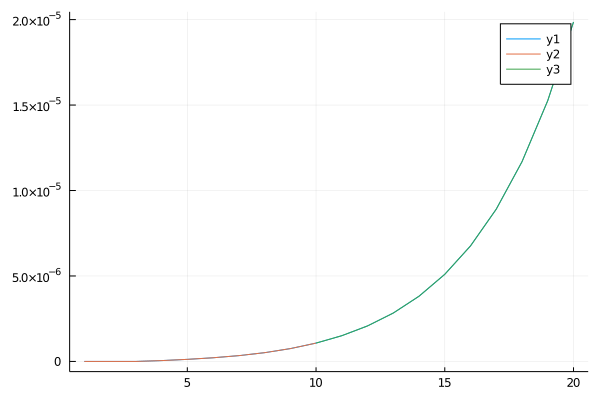

In [119]:
plot([1:20, 1:10, 10:20], [epi_params1.ρᴵᵍ[1,1,:], epi_params2.ρᴵᵍ[1,1,:], epi_params3.ρᴵᵍ[1,1,:]])

In [ ]:
epi_params.

In [55]:
reset_params!(epi_params, population)
set_initial_infected!(epi_params, population, E₀, A₀, I₀)


In [42]:
# Run the model with a single containment strategy
reset_params!(epi_params, population)
set_initial_infected!(epi_params, population, E₀, A₀, I₀)
run_epidemic_spreading_mmca!(epi_params, population; tᶜ = tᶜ, κ₀ = κ₀, ϕ = ϕ, δ = δ, verbose=true)

Time: 1, players: 1000000.00, infected: 4.00, cases: 0.00, icus: 0.00, deaths: 0.00
Time: 2, players: 1000000.00, infected: 3.74, cases: 0.26, icus: 0.00, deaths: 0.00
Time: 3, players: 1000000.00, infected: 4.14, cases: 0.72, icus: 0.00, deaths: 0.00
Time: 4, players: 1000000.00, infected: 5.07, cases: 1.25, icus: 0.00, deaths: 0.00
Time: 5, players: 1000000.00, infected: 6.37, cases: 1.84, icus: 0.00, deaths: 0.00
Time: 6, players: 1000000.00, infected: 8.02, cases: 2.54, icus: 0.01, deaths: 0.01
Time: 7, players: 1000000.00, infected: 10.09, cases: 3.41, icus: 0.01, deaths: 0.01
Time: 8, players: 1000000.00, infected: 12.69, cases: 4.49, icus: 0.01, deaths: 0.02
Time: 9, players: 1000000.00, infected: 15.98, cases: 5.86, icus: 0.02, deaths: 0.03
Time: 10, players: 1000000.00, infected: 20.15, cases: 7.57, icus: 0.02, deaths: 0.04
Time: 11, players: 1000000.00, infected: 25.44, cases: 9.73, icus: 0.03, deaths: 0.05
Time: 12, players: 1000000.00, infected: 32.16, cases: 12.45, icus: 0